In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 0. 데이터 세트 로드

* 총 개수: 130,671

In [24]:
DATA_PATH = "../data"

In [25]:
emotion_df = pd.read_csv(os.path.join(DATA_PATH, "sentimental_analysis.csv"))
emotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130671 entries, 0 to 130670
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   cat1      130671 non-null  object
 1   cat2      130671 non-null  object
 2   sentence  130671 non-null  object
dtypes: object(3)
memory usage: 3.0+ MB


# 1. 감정대분류-감정소분류

### 감정대분류에 따른 발화 수

Text(0.5, 1.0, '감정 대분류 별 발화 수')

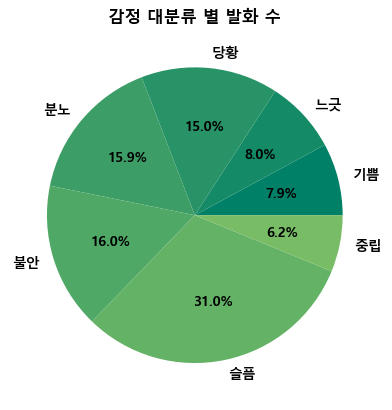

In [26]:
count_by_emotion_big_type = emotion_df.groupby(['cat1']).size()
colors = plt.cm.summer([0, 20, 40, 60, 80, 100, 120, 140])

plt.pie(count_by_emotion_big_type, labels=count_by_emotion_big_type.keys(), colors=colors, autopct="%.1f%%", textprops={'color': 'black', 'weight': 'bold'})
plt.title("감정 대분류 별 발화 수", fontweight='bold')

### 감정대분류, 감정소분류에 따른 발화 수

In [37]:
count_by_emotion_type = emotion_df.groupby(['cat1', 'cat2']).size()
emotion_type = count_by_emotion_type.keys()
emotion_big = set() 
emotion_small = dict()

for big, small in emotion_type:
    if big not in emotion_big:
        emotion_big.add(big)
        emotion_small[big] = [small]
        continue

    emotion_small[big].append(small)

print(f"<emotion 대분류>\n {emotion_big}")
print(f"<emotion 소분류>")
color_index_list = []
color_index = 0
emotion_big = sorted(list(emotion_big))
for big in list(emotion_big):
    print(f"{big}: {emotion_small[big]}")
    for _ in range(len(emotion_small[big])):
        color_index_list.append(color_index)
    color_index += 30
emotion_type_set = emotion_type.map(lambda x: '_'.join(x))

<emotion 대분류>
 {'분노', '중립', '당황', '슬픔', '기쁨', '불안', '느긋'}
<emotion 소분류>
기쁨: ['기쁨', '신이 난', '행복', '흥분']
느긋: ['감사하는', '느긋', '만족스러운', '신뢰하는', '안도', '자신하는', '편안한']
당황: ['고립된', '남의 시선을 의식하는', '당황', '부끄러운', '열등감', '외로운', '죄책감의', '한심한', '혐오스러운', '혼란스러운']
분노: ['구역질 나는', '노여워하는', '방어적인', '분노', '성가신', '악의적인', '안달하는', '좌절한', '짜증내는', '툴툴대는']
불안: ['걱정스러운', '당혹스러운', '두려운', '불안', '스트레스 받는', '조심스러운', '초조한', '취약한', '혼란스러운', '회의적인']
슬픔: ['가난한, 불우한', '고립된', '괴로워하는', '낙담한', '눈물이 나는', '마비된', '배신당한', '버려진', '비통한', '상처', '슬픔', '실망한', '억울한', '염세적인', '우울한', '질투하는', '충격 받은', '환멸을 느끼는', '후회되는', '희생된']
중립: ['중립']


Text(0, 0.5, '데이터 수')

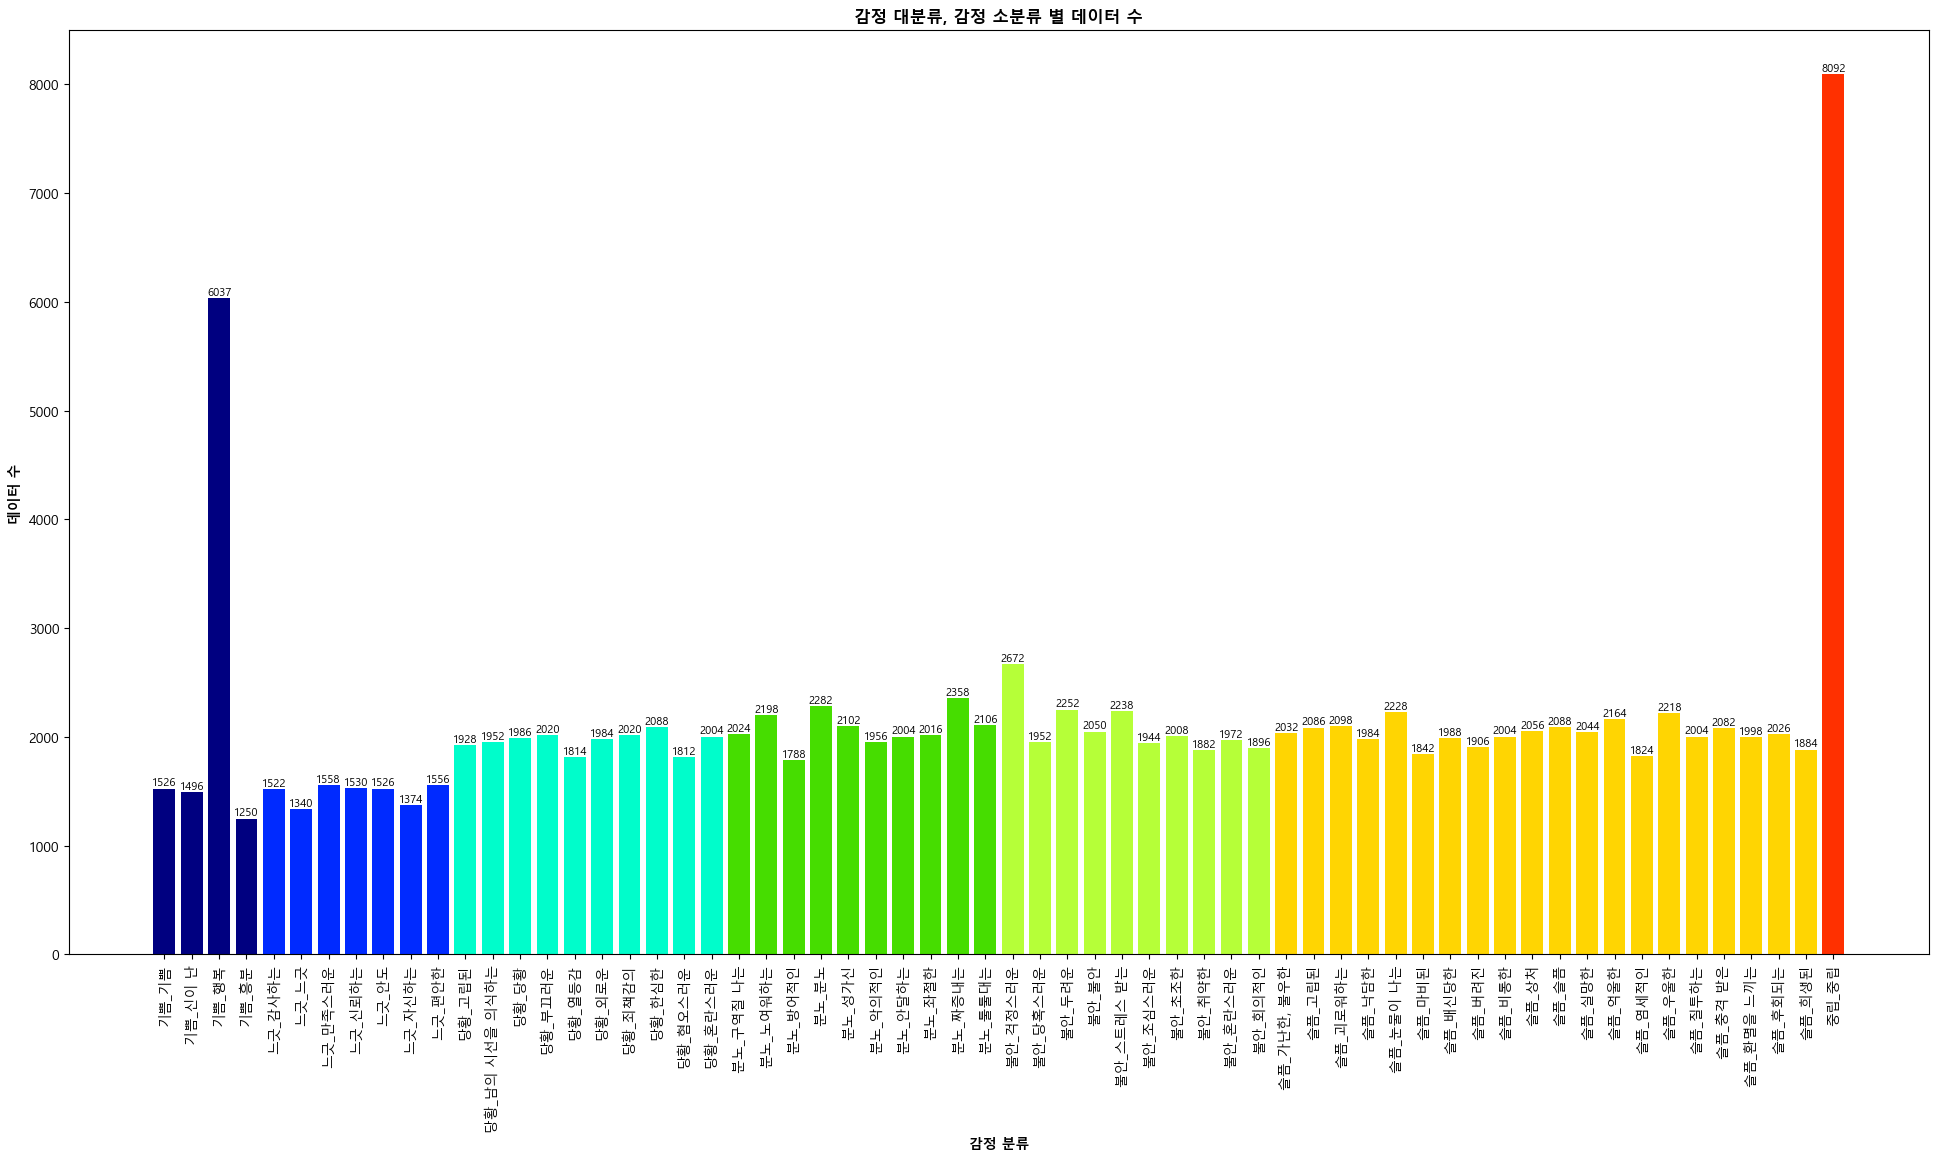

In [38]:
plt.figure(figsize=(24,12))
colors = plt.cm.gist_ncar(color_index_list)
bars = plt.bar(emotion_type_set, count_by_emotion_type, color=colors)
for bar, value in zip(bars, count_by_emotion_type):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=8)
plt.xticks(np.arange(len(emotion_type_set)), emotion_type_set, rotation='vertical')
plt.title("감정 대분류, 감정 소분류 별 데이터 수", fontweight='bold')
plt.xlabel("감정 분류", fontweight='bold')
plt.ylabel("데이터 수", fontweight='bold')